## Hydrogen Torch - Image Semantic Segmentation 予測結果ファイル

In [71]:
from scipy.ndimage import zoom
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
!ls pred/preds_semantic-FashonImage.fold0.predict.1_fold0

test_predictions.csv     test_raw_predictions.pkl


## csvファイル

In [4]:
df = pd.read_csv('pred/preds_semantic-FashonImage.fold0.predict.1_fold0/test_predictions.csv')
df.shape

(50, 6)

In [8]:
df.head(10)

,image,class_id,rle_mask,pred_rle_mask,image_height,image_width
0,img_0307.png,coat,114916 41 115739 46 116513 101 117335 107 1174...,115752 56 115826 10 115862 9 116570 130 116727...,825,550
1,img_0307.png,dress,NaN,NaN,825,550
2,img_0307.png,pants,133305 4 133311 35 134129 42 134954 42 135779 ...,149756 7 150580 11 151405 14 152230 18 153056 ...,825,550
3,img_0307.png,shirt,122518 3 123342 10 124166 13 124991 14 125815 ...,196486 3 197310 6 197318 2 198134 12 198958 15...,825,550
4,img_0307.png,shoes,129479 4 130302 20 131126 27 131950 29 132774 ...,98945 8 99768 12 100591 15 101415 17 102239 19...,825,550
5,img_0079.png,coat,NaN,119898 1 120720 8 121543 11 122365 15 123183 2...,825,550
6,img_0079.png,dress,148972 3 149780 20 150589 36 151411 39 152205 ...,153184 12 153993 44 154725 40 154786 85 155542...,825,550
7,img_0079.png,pants,NaN,NaN,825,550
8,img_0079.png,shirt,122354 5 123179 9 124000 3 124006 8 124823 5 1...,126475 12 127298 15 128120 19 128941 24 129763...,825,550
9,img_0079.png,shoes,142683 5 143508 6 144332 8 145157 9 145982 14 ...,130255 17 131076 24 131898 29 132720 34 133543...,825,550


In [10]:
df['image'].value_counts()

img_0307.png    5
img_0079.png    5
img_0352.png    5
img_0660.png    5
img_0208.png    5
img_0925.png    5
img_0570.png    5
img_0747.png    5
img_0187.png    5
img_0603.png    5
Name: image, dtype: int64

In [12]:
df['pred_rle_mask'][0]

'115752 56 115826 10 115862 9 116570 130 116727 4 117389 140 117537 24 118204 185 119018 198 119835 208 120653 216 121470 225 122282 239 123099 248 123921 251 124743 255 125564 259 126386 263 127209 265 128033 266 128856 268 129680 270 130504 271 131328 272 132152 273 132976 274 133800 275 134625 274 135449 275 136274 275 137098 276 137922 276 138747 276 139572 276 140396 277 141221 277 142045 279 142870 279 143694 280 144519 280 145343 281 146168 281 146993 281 147817 282 148642 282 149467 283 150291 284 151116 285 151941 285 152765 287 153590 287 154414 289 155239 289 156064 290 156888 291 157713 291 158537 293 159362 293 160186 295 161011 295 161835 297 162660 297 163484 299 164308 300 165132 301 165956 303 166781 303 167605 304 168430 304 169254 305 170079 305 170904 305 171728 306 172552 307 173377 307 174202 308 175027 308 175852 308 176677 308 177502 308 178327 308 179152 309 179977 309 180801 310 181626 310 182451 310 183276 310 184102 310 184927 310 185753 309 186579 308 18740

## pickleファイル

In [15]:
dic = pd.read_pickle('pred/preds_semantic-FashonImage.fold0.predict.1_fold0/test_raw_predictions.pkl')
type(dic)

dict

In [17]:
dic.keys()

dict_keys(['masks', 'original_image_shapes', 'rle_predictions', 'class_names', 'image'])

- image: 画像ファイル名
- original_image_shapes: 元画像の画像サイズ
- class_names: Semanticカテゴリ
- masks: 各Semanticカテゴリのマスク情報
- rle_predictions: RLE Encoding

In [27]:
# 元画像（10枚）
dic['image']

array(['img_0307.png', 'img_0079.png', 'img_0352.png', 'img_0660.png',
       'img_0208.png', 'img_0925.png', 'img_0570.png', 'img_0747.png',
       'img_0187.png', 'img_0603.png'], dtype=object)

In [42]:
!ls fashion_image_semantic_segmentation_SAMPLE/images

img_0079.png img_0208.png img_0352.png img_0603.png img_0747.png
img_0187.png img_0307.png img_0570.png img_0660.png img_0925.png


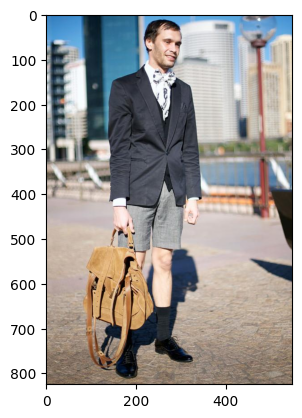

In [48]:
img_path = 'fashion_image_semantic_segmentation_SAMPLE/images/img_0307.png'
image = mpimg.imread(img_path)
plt.imshow(image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.05518499..1.0616454].


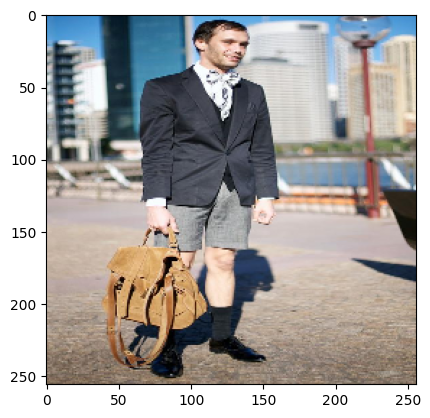

In [72]:
img_path = 'fashion_image_semantic_segmentation_SAMPLE/images/img_0307.png'
image = mpimg.imread(img_path)
original_shape = image.shape
# 縮小倍率を計算して画像を(256, 256)にリサイズ
zoom_factor = (256 / original_shape[0], 256 / original_shape[1], 1)  # RGB画像の場合
resized_image = zoom(image, zoom_factor)
plt.imshow(resized_image)
plt.show()

In [49]:
# 元画像（10枚）の画像サイズ
dic['original_image_shapes']

array([[825, 550],
       [825, 550],
       [825, 550],
       [825, 550],
       [825, 550],
       [825, 550],
       [825, 550],
       [825, 550],
       [825, 550],
       [825, 550]], dtype=int32)

In [50]:
# Semanticカテゴリ
dic['class_names']

['coat', 'dress', 'pants', 'shirt', 'shoes']

In [51]:
# 予測結果。Semanticカテゴリ（5種）のマスク情報
dic['masks'].shape

# [Image Width, Image Height] = [256, 256]の画像サイズ（Reshape）で学習が実施されている

(10, 5, 256, 256)

In [52]:
dic['masks'][0][0]

array([[0.0874033 , 0.01886206, 0.01134054, ..., 0.00930751, 0.01334735,
        0.0348162 ],
       [0.03286795, 0.0026778 , 0.00161742, ..., 0.00144265, 0.00157916,
        0.00855291],
       [0.02002976, 0.00141642, 0.0011383 , ..., 0.00135571, 0.00117042,
        0.00583647],
       ...,
       [0.00759666, 0.00093773, 0.00060582, ..., 0.0004334 , 0.00038866,
        0.00420359],
       [0.03017959, 0.00222693, 0.00126725, ..., 0.00085341, 0.00076203,
        0.00735853],
       [0.15875098, 0.04102109, 0.02762418, ..., 0.0217987 , 0.01241336,
        0.08101957]], dtype=float32)

In [53]:
dic['masks'][0][0].mean(), dic['masks'][0][0].min(), dic['masks'][0][0].max()

(0.12703997, 0.00032311073, 0.9701689)

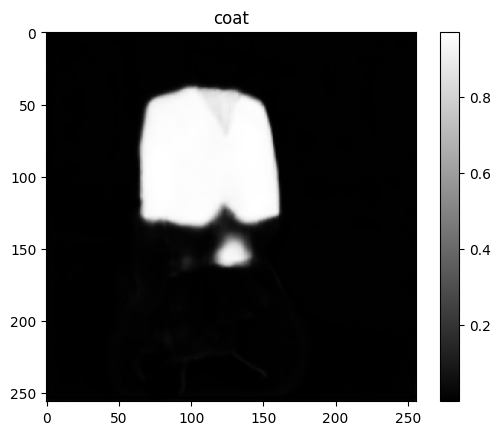

In [68]:
plt.imshow(dic['masks'][0][0], cmap='gray')
plt.title(dic['class_names'][0])
plt.colorbar()
plt.show()

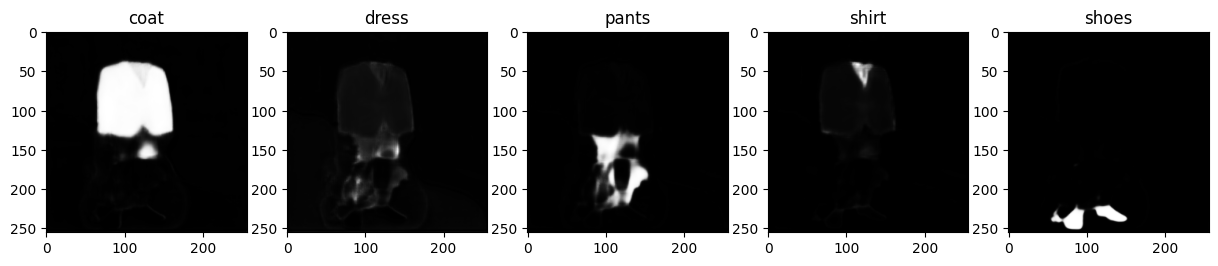

In [67]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(dic['masks'][0][i], cmap='gray')
    axes[i].set_title(dic['class_names'][i])

In [22]:
# 予測結果。rle表現

dic['rle_predictions'].shape

(10, 5)

In [75]:
dic['rle_predictions'][0][0]

# df['pred_rle_mask'][0]と一致

'115752 56 115826 10 115862 9 116570 130 116727 4 117389 140 117537 24 118204 185 119018 198 119835 208 120653 216 121470 225 122282 239 123099 248 123921 251 124743 255 125564 259 126386 263 127209 265 128033 266 128856 268 129680 270 130504 271 131328 272 132152 273 132976 274 133800 275 134625 274 135449 275 136274 275 137098 276 137922 276 138747 276 139572 276 140396 277 141221 277 142045 279 142870 279 143694 280 144519 280 145343 281 146168 281 146993 281 147817 282 148642 282 149467 283 150291 284 151116 285 151941 285 152765 287 153590 287 154414 289 155239 289 156064 290 156888 291 157713 291 158537 293 159362 293 160186 295 161011 295 161835 297 162660 297 163484 299 164308 300 165132 301 165956 303 166781 303 167605 304 168430 304 169254 305 170079 305 170904 305 171728 306 172552 307 173377 307 174202 308 175027 308 175852 308 176677 308 177502 308 178327 308 179152 309 179977 309 180801 310 181626 310 182451 310 183276 310 184102 310 184927 310 185753 309 186579 308 18740